<a href="https://colab.research.google.com/github/javed163/NLP-/blob/main/day_11_fake_new_dataset_classification_using_Bidirectional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [3]:
df.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [6]:
df = df.dropna()

In [7]:
df.shape

(18285, 5)

In [8]:
# get the independent features
x = df.drop('label', axis=1)
y = df['label']

In [9]:
y.value_counts()

,count
label,
0,10361
1,7924


In [14]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
# vocabulary size
voc_size = 5000


In [16]:
messages = x.copy()

In [17]:
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [18]:
import nltk
import re
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
messages.reset_index(inplace = True)

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)


In [23]:
# corpus

In [24]:
one_hot_rep = [one_hot(words, voc_size) for words in corpus]
print(one_hot_rep)

[[4185, 1457, 36, 506, 196, 3297, 277, 2218, 177, 3098], [4023, 4779, 1959, 3542, 3642, 22, 3825], [1882, 3348, 4694, 4658], [160, 3397, 3310, 3969, 2898, 1881], [4009, 3642, 1298, 2106, 4503, 3044, 3642, 1271, 1844, 4856], [4208, 3231, 3396, 1266, 755, 4804, 3776, 996, 4961, 2241, 1551, 2982, 2436, 795, 3825], [3100, 486, 3915, 4296, 4638, 2710, 208, 953, 1733, 2421, 3929], [176, 3133, 3660, 1484, 4733, 685, 4804, 4146, 1733, 2421, 3929], [1678, 121, 4469, 4051, 416, 1371, 657, 2760, 4804, 3485], [30, 1166, 2540, 3021, 4498, 3432, 3111, 4860], [3959, 2616, 519, 1931, 558, 648, 2223, 3364, 3376, 453, 877], [3969, 2714, 196, 1371, 4804, 4733], [624, 1023, 1670, 1379, 1903, 2794, 2151, 548, 3446], [4384, 230, 4485, 4659, 347, 4562, 4413, 1733, 2421, 3929], [4208, 4162, 4392, 4553, 462, 1733, 2421, 3929], [1319, 3361, 3725, 3067, 4519, 3313, 851, 4128, 1980, 3442], [1043, 4301, 4779], [4923, 2741, 339, 3319, 4804, 1257, 914, 3825], [1018, 591, 1959, 3610, 2891, 3652, 379, 215, 3044], [280

In [25]:
one_hot_rep[2]

[1882, 3348, 4694, 4658]

# Embedding representation

In [28]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2218  177 3098]
 [   0    0    0 ... 3642   22 3825]
 [   0    0    0 ... 3348 4694 4658]
 ...
 [   0    0    0 ... 1733 2421 3929]
 [   0    0    0 ... 3625  223  312]
 [   0    0    0 ...  265 4413 3451]]


In [32]:
# creating model
model = Sequential()
model.add(Embedding(voc_size, 40, input_length = sent_length))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer='he_normal'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(embedded_docs, y, test_size = 0.3, random_state = 42)

In [47]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=7)

Epoch 1/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9094 - val_loss: 0.3778
Epoch 2/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9085 - val_loss: 0.4761
Epoch 3/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9098 - val_loss: 0.4682
Epoch 4/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 0.9096 - val_loss: 0.4876
Epoch 5/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9092 - val_loss: 0.5257
Epoch 6/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.9089 - val_loss: 0.5600
Epoch 7/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9973 - loss: 0.0069 - val_accuracy: 0.9074 - val_loss: 0.5383


In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (32, 20, 40)                │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (32, 20, 40)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (32, 200)                   │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 200)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1)                     │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 939,005 (3.58 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 626,004 (2.39 MB)

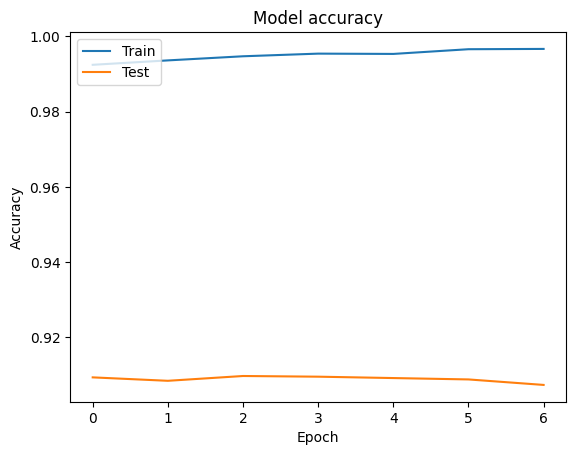

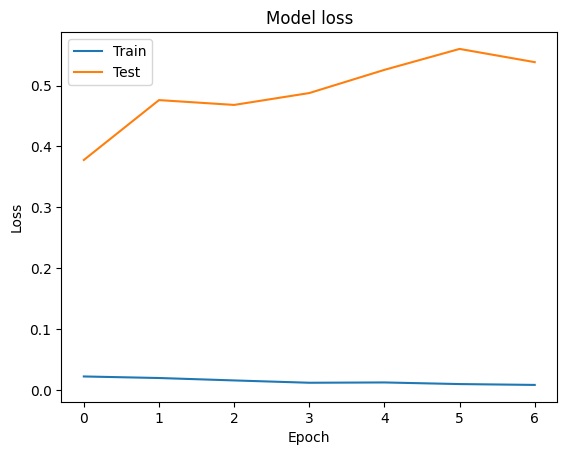

In [48]:

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [42]:
y_pred = model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [43]:
y_pred = np.where(y_pred > 0.6, 1,0)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.907765220561429

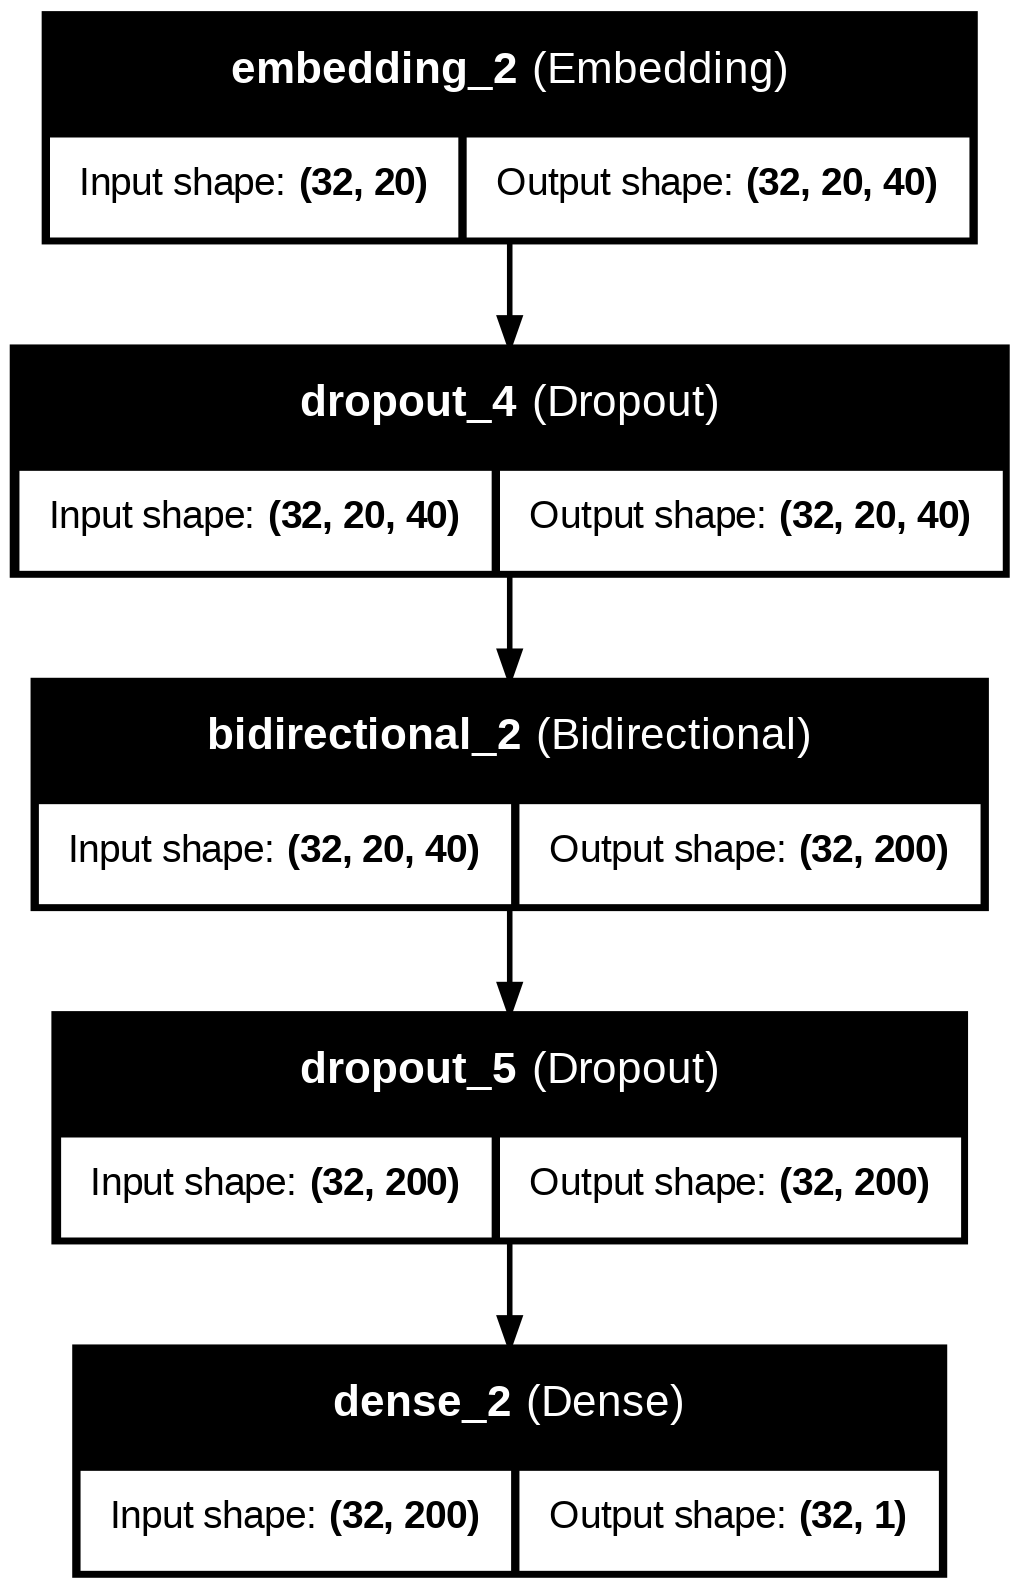

In [46]:

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
